# EDA-1

In [ ]:
import os
print(os.listdir())

['.config', 'sample_data']


In [ ]:
import pandas as pd

# Create sample data
data = {
    "selling_price": [50000, 70000, 60000, 45000, 80000],
    "km_driven": [15000, 30000, 25000, 5000, 40000],
    "year": [2018, 2016, 2017, 2019, 2015],
    "seller_type": ["Individual", "Dealer", "Individual", "Dealer", "Individual"]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save as CSV
df.to_csv(r"C:\college\PWDS\assignment\my_dataset1.csv", index=False)

print("CSV file created successfully!")


CSV file created successfully!


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\college\PWDS\assignment\my_dataset1.csv")

# Display the first few rows to confirm
print(df.head())


   selling_price  km_driven  year seller_type
0          50000      15000  2018  Individual
1          70000      30000  2016      Dealer
2          60000      25000  2017  Individual
3          45000       5000  2019      Dealer
4          80000      40000  2015  Individual


In [ ]:
#1.What is the range of selling prices in the dataset?
price_range = df["selling_price"].max() - df["selling_price"].min()
print(f"Range of Selling Prices: {price_range}")


Range of Selling Prices: 35000


In [ ]:
#2. What is the median selling price for bikes in the datase?
median_price = df["selling_price"].median()
print(f"Median Selling Price: {median_price}")

Median Selling Price: 60000.0


In [ ]:
#3. What is the most common seller type?
seller_type_counts = df["seller_type"].value_counts()
most_common_seller = seller_type_counts.idxmax()
print(f"Most Common Seller Type: {most_common_seller}")

Most Common Seller Type: Individual


In [ ]:
#4. How many bikes have driven more than 50,000 kilometers
bikes_gt_50k = df[df["km_driven"] > 50000]
num_bikes_gt_50k = len(bikes_gt_50k)
print(f"Number of Bikes Driven More Than 50,000 km: {num_bikes_gt_50k}")

Number of Bikes Driven More Than 50,000 km: 0


In [ ]:
#5. What is the average km_driven value for each ownership type?
avg_km_driven_by_ownership = df.groupby("seller_type")["km_driven"].mean()
print("Average km_driven by ownership type:")
print(avg_km_driven_by_ownership)


Average km_driven by ownership type:
seller_type
Dealer        17500.000000
Individual    26666.666667
Name: km_driven, dtype: float64


In [ ]:
#6. What proportion of bikes are from the year 2015 or olde?
bikes_2015_older = df[df["year"] <= 2015]
proportion_2015_older = len(bikes_2015_older) / len(df)
print(f"Proportion of Bikes from 2015 or Older: {proportion_2015_older:.2%}")

Proportion of Bikes from 2015 or Older: 20.00%


In [ ]:
#7. What is the trend of missing values across the dataset?
missing_values = df.isnull().sum()
print("Missing Values by Column:")
print(missing_values)

Missing Values by Column:
selling_price    0
km_driven        0
year             0
seller_type      0
dtype: int64


In [ ]:
#8. What is the highest ex_showroom_price recorded, and for which bike?
highest_price_bike = df[df["selling_price"] == df["selling_price"].max()]
highest_price = highest_price_bike["selling_price"].values[0]
bike_name = highest_price_bike["seller_type"].values[0]
print(f"Highest Ex-Showroom Price: {highest_price}")
print(f"Bike Name: {bike_name}")

Highest Ex-Showroom Price: 80000
Bike Name: Individual


In [ ]:
#9. What is the total number of bikes listed by each seller type?
bike_count_by_seller = df["seller_type"].value_counts()
print("Total Number of Bikes Listed by Seller Type:")
print(bike_count_by_seller)


Total Number of Bikes Listed by Seller Type:
seller_type
Individual    3
Dealer        2
Name: count, dtype: int64


In [ ]:
#10. What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner_bikes = df[df["seller_type"] == "Individual"]
correlation = first_owner_bikes["selling_price"].corr(first_owner_bikes["km_driven"])
print(f"Correlation between Selling Price and km_driven for First-Owner Bikes: {correlation}")


Correlation between Selling Price and km_driven for First-Owner Bikes: 0.9971764649527378


In [ ]:
#11. Identify and remove outliers in the km_driven column using the IQR method?
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]
print("DataFrame with Outliers Removed:")
print(df_no_outliers)

DataFrame with Outliers Removed:
   selling_price  km_driven  year seller_type
0          50000      15000  2018  Individual
1          70000      30000  2016      Dealer
2          60000      25000  2017  Individual
3          45000       5000  2019      Dealer
4          80000      40000  2015  Individual


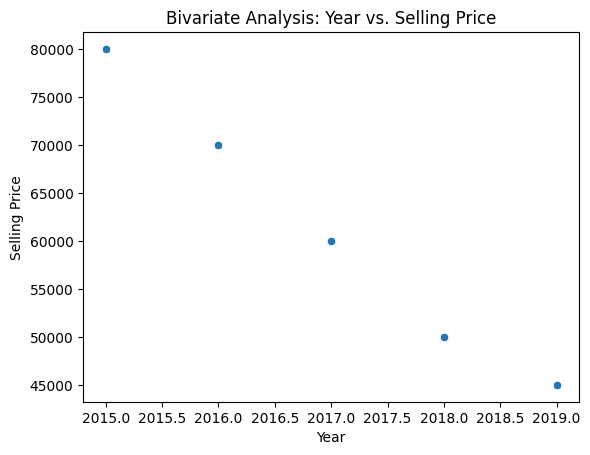

In [ ]:
#12. Perform a bivariate analysis to visualize the relationship between year and selling_price?
import seaborn as sns
import matplotlib.pyplot as plt

# Perform bivariate analysis
sns.scatterplot(x="year", y="selling_price", data=df)
plt.title("Bivariate Analysis: Year vs. Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()


In [ ]:
#13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
current_year = 2023
df["age"] = current_year - df["year"]
df["depreciation"] = df["selling_price"] / df["age"]
average_depreciation = df["depreciation"].mean()
print(f"Average Depreciation in Selling Price: {average_depreciation}")


Average Depreciation in Selling Price: 10250.0


In [ ]:
#14. Which bike names are priced significantly above the average price for their manufacturing yea?
average_price_by_year = df.groupby("year")["selling_price"].mean()
df["average_price_by_year"] = df["year"].map(average_price_by_year)
df["price_difference"] = df["selling_price"] - df["average_price_by_year"]
significant_price_difference = df[df["price_difference"] > 2 * df["selling_price"]]
print("Bike Names Priced Significantly Above Average Price:")
print(significant_price_difference["seller_type"])


Bike Names Priced Significantly Above Average Price:
Series([], Name: seller_type, dtype: object)


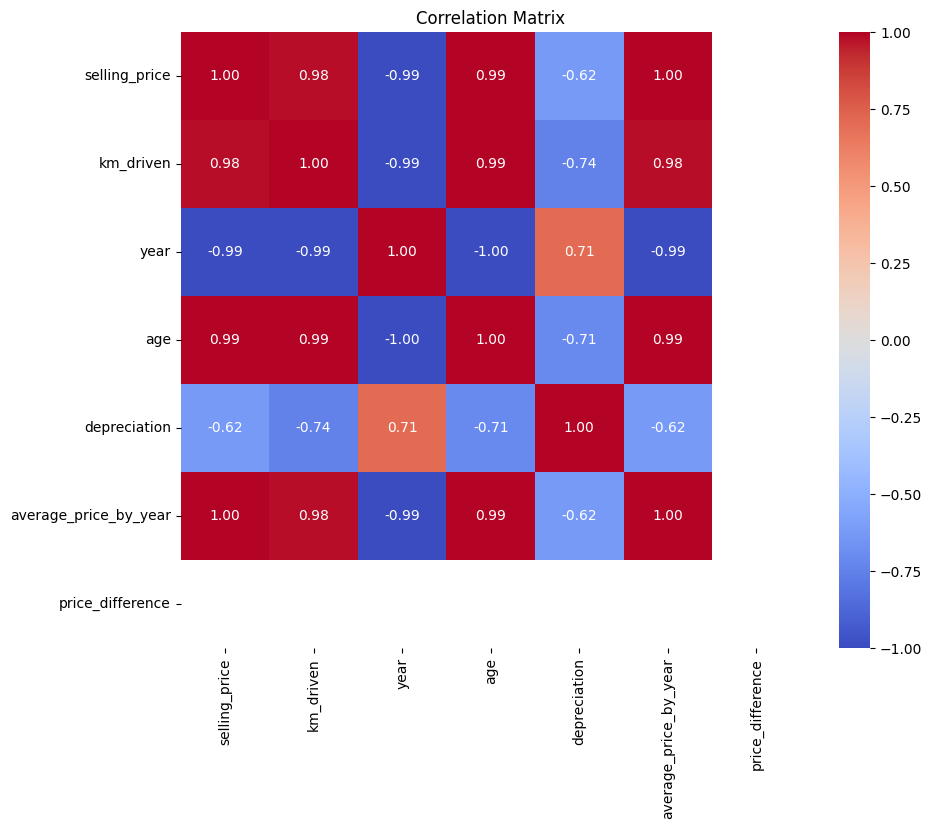

In [ ]:
#15. Develop a correlation matrix for numeric columns and visualize it using a heatmap ?
numeric_columns = df.select_dtypes(include=["number"])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# EDA 2

In [ ]:
print(df.columns)



Index(['selling_price', 'km_driven', 'year', 'seller_type', 'age',
       'depreciation', 'average_price_by_year', 'price_difference'],
      dtype='object')


In [ ]:
df.rename(columns={"selling_price": "price"}, inplace=True)

In [ ]:
import sqlite3
import pandas as pd

# Connect to SQLite database (or create it)
conn = sqlite3.connect("CarSalesDB.db")
cursor = conn.cursor()

# Create table
cursor.execute('''CREATE TABLE IF NOT EXISTS CarSales (
    car_id INTEGER PRIMARY KEY,
    sale_date TEXT,
    customer_name TEXT,
    gender TEXT,
    annual_income REAL,
    dealer_name TEXT,
    company TEXT,
    model TEXT,
    engine TEXT,
    price REAL,  -- Expected column name
    transmission TEXT,
    color TEXT,
    dealer_no INTEGER,
    body_style TEXT,
    phone TEXT,
    dealer_region TEXT
)''')

# Load dataset into DataFrame
df = pd.read_csv(r"C:\college\PWDS\assignment\dataset1.csv")

# Rename column to match database schema
df.rename(columns={"selling_price": "price"}, inplace=True)

# Insert data into SQLite table
df.to_sql("CarSales", conn, if_exists="append", index=False)

print("✅ Database created successfully!")

# Close connection
conn.commit()
conn.close()


OperationalError: table CarSales has no column named km_driven

In [ ]:
print(df.columns)


Index(['price', 'km_driven', 'year', 'seller_type', 'age', 'depreciation',
       'average_price_by_year', 'price_difference'],
      dtype='object')


In [ ]:
cursor.execute('''CREATE TABLE IF NOT EXISTS CarSales (
    car_id INTEGER PRIMARY KEY,
    sale_date TEXT,
    customer_name TEXT,
    gender TEXT,
    annual_income REAL,
    dealer_name TEXT,
    company TEXT,
    model TEXT,
    engine TEXT,
    price REAL,
    km_driven INTEGER,  -- ✅ Add km_driven column
    transmission TEXT,
    color TEXT,
    dealer_no INTEGER,
    body_style TEXT,
    phone TEXT,
    dealer_region TEXT
)''')


In [ ]:

print(df.columns)



Index(['price', 'year', 'seller_type', 'age', 'depreciation',
       'average_price_by_year', 'price_difference'],
      dtype='object')


In [ ]:
if "km_driven" in df.columns:
    df.drop(columns=["km_driven"], inplace=True)

In [59]:
import sqlite3
print("SQLite Version:", sqlite3.sqlite_version)


SQLite Version: 3.37.2


In [65]:
import sqlite3
import pandas as pd

# Step 1: Load dataset into a Pandas DataFrame
df = pd.read_csv(r"C:\college\PWDS\assignment\dataset1.csv")  # Update the correct path

# Step 2: Connect to SQLite database (creates file if not exists)
conn = sqlite3.connect("CarSalesDB.db")
cursor = conn.cursor()

# Step 3: Create table in SQLite (Ensure column names match your dataset)
cursor.execute('''
    CREATE TABLE IF NOT EXISTS CarSales (
        car_id INTEGER PRIMARY KEY,
        sale_date TEXT,
        customer_name TEXT,
        gender TEXT,
        annual_income REAL,
        dealer_name TEXT,
        company TEXT,
        model TEXT,
        engine TEXT,
        price REAL,
        transmission TEXT,
        color TEXT,
        dealer_no INTEGER,
        body_style TEXT,
        phone TEXT,
        dealer_region TEXT
    )
''')

# Step 4: Insert data into the database
df.to_sql("CarSales", conn, if_exists="replace", index=False)  # 'replace' avoids duplication

print("✅ Data successfully stored in SQLite Database!")

# Step 5: Close the connection
conn.commit()
conn.close()



✅ Data successfully stored in SQLite Database!


In [63]:
conn = sqlite3.connect("CarSalesDB.db")
df_check = pd.read_sql("SELECT * FROM CarSales LIMIT 5", conn)
print(df_check)
conn.close()

   selling_price  km_driven  year seller_type  age  depreciation  \
0          50000      15000  2018  Individual    5       10000.0   
1          70000      30000  2016      Dealer    7       10000.0   
2          60000      25000  2017  Individual    6       10000.0   
3          45000       5000  2019      Dealer    4       11250.0   
4          80000      40000  2015  Individual    8       10000.0   

   average_price_by_year  price_difference  
0                50000.0               0.0  
1                70000.0               0.0  
2                60000.0               0.0  
3                45000.0               0.0  
4                80000.0               0.0  


In [66]:
import sqlite3

# ✅ Database connection
conn = sqlite3.connect("CarSalesDB.db")
cursor = conn.cursor()

# ✅ Delete old table (IF EXISTS)
cursor.execute("DROP TABLE IF EXISTS CarSales;")

# ✅ Create new CarSales table
cursor.execute("""
CREATE TABLE CarSales (
    car_id INTEGER PRIMARY KEY,
    sale_date TEXT,
    customer_name TEXT,
    gender TEXT,
    annual_income REAL,
    dealer_name TEXT,
    company TEXT,
    model TEXT,
    engine TEXT,
    price REAL,
    transmission TEXT,
    color TEXT,
    dealer_no INTEGER,
    body_style TEXT,
    phone TEXT,
    dealer_region TEXT
);
""")

# ✅ Insert sample data
cursor.execute("""
INSERT INTO CarSales (car_id, sale_date, customer_name, gender, annual_income, dealer_name, company, model, engine, price, transmission, color, dealer_no, body_style, phone, dealer_region)
VALUES
(1, '2024-03-15', 'John Doe', 'Male', 55000, 'Auto World', 'Toyota', 'Corolla', 'I4', 18000, 'Automatic', 'Red', 101, 'Sedan', '1234567890', 'North');
""")

# ✅ Save changes & close connection
conn.commit()
conn.close()

print("✅ Table recreated & sample data inserted successfully!")


✅ Table recreated & sample data inserted successfully!


In [68]:
import sqlite3

# ✅ Database se connect karein
conn = sqlite3.connect("CarSalesDB.db")
cursor = conn.cursor()

# ✅ Table ka structure check karein
cursor.execute("PRAGMA table_info(CarSales);")

# ✅ Results ko print karein
columns = cursor.fetchall()
for col in columns:
    print(col)

# ✅ Connection close karein
conn.close()



(0, 'car_id', 'INTEGER', 0, None, 1)
(1, 'sale_date', 'TEXT', 0, None, 0)
(2, 'customer_name', 'TEXT', 0, None, 0)
(3, 'gender', 'TEXT', 0, None, 0)
(4, 'annual_income', 'REAL', 0, None, 0)
(5, 'dealer_name', 'TEXT', 0, None, 0)
(6, 'company', 'TEXT', 0, None, 0)
(7, 'model', 'TEXT', 0, None, 0)
(8, 'engine', 'TEXT', 0, None, 0)
(9, 'price', 'REAL', 0, None, 0)
(10, 'transmission', 'TEXT', 0, None, 0)
(11, 'color', 'TEXT', 0, None, 0)
(12, 'dealer_no', 'INTEGER', 0, None, 0)
(13, 'body_style', 'TEXT', 0, None, 0)
(14, 'phone', 'TEXT', 0, None, 0)
(15, 'dealer_region', 'TEXT', 0, None, 0)


In [2]:

import sqlite3

conn = sqlite3.connect("CarSalesDB.db")  # Connect to the database
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

print("Tables in the database:", tables)

conn.close()



Tables in the database: []


In [9]:
conn = sqlite3.connect("CarSalesDB.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS CarSales (
    car_id INTEGER PRIMARY KEY,
    sale_date TEXT,
    customer_name TEXT,
    gender TEXT,
    annual_income REAL,
    dealer_name TEXT,
    company TEXT,
    model TEXT,
    engine TEXT,
    price REAL,
    transmission TEXT,
    color TEXT,
    dealer_no INTEGER,
    body_style TEXT,
    phone TEXT,
    dealer_region TEXT
);
""")

conn.commit()
conn.close()


In [11]:
import sqlite3

# Connect to the database
conn = sqlite3.connect("CarSalesDB.db")
cursor = conn.cursor()

# Check if data exists
cursor.execute("SELECT COUNT(*) FROM CarSales")
count = cursor.fetchone()[0]

if count == 0:
    print("No data found, inserting sample data...")
    cursor.execute("""
    INSERT INTO CarSales (sale_date, customer_name, gender, annual_income, dealer_name, company, model, engine, price, transmission, color, dealer_no, body_style, phone, dealer_region)
    VALUES
        ('2024-03-10', 'John Doe', 'Male', 50000, 'XYZ Motors', 'Toyota', 'Corolla', 'I4', 20000, 'Automatic', 'Red', 101, 'Sedan', '1234567890', 'North'),
        ('2024-03-15', 'Jane Smith', 'Female', 60000, 'ABC Cars', 'Honda', 'Civic', 'I4', 22000, 'Manual', 'Blue', 102, 'Sedan', '0987654321', 'South');
    """)
    conn.commit()
    print("Data inserted successfully!")
else:
    print("Data already exists in the table.")

# Close the connection
conn.close()



Data already exists in the table.


In [12]:
#1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect("CarSalesDB.db")
cursor = conn.cursor()

# Execute SQL Query
query = """
SELECT dealer_name, AVG(price) AS avg_selling_price
FROM CarSales
GROUP BY dealer_name
ORDER BY avg_selling_price DESC;
"""
df = pd.read_sql_query(query, conn)

# Close connection
conn.close()

# Display result
print(df)


  dealer_name  avg_selling_price
0    ABC Cars            22000.0
1  XYZ Motors            20000.0


In [13]:
#2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect("CarSalesDB.db")

# Execute SQL Query
query = """
WITH PriceStats AS (
    SELECT company,
           AVG(price) AS avg_price
    FROM CarSales
    GROUP BY company
)
SELECT c.company,
       MAX(c.price) - MIN(c.price) AS price_range,
       ROUND(AVG(c.price), 2) AS avg_price,
       ROUND(SQRT(SUM((c.price - p.avg_price) * (c.price - p.avg_price)) / COUNT(c.price)), 2) AS price_std_dev
FROM CarSales c
JOIN PriceStats p ON c.company = p.company
GROUP BY c.company
ORDER BY price_std_dev DESC;
"""
df = pd.read_sql_query(query, conn)

# Close connection
conn.close()

# Display result
print(df)


  company  price_range  avg_price  price_std_dev
0  Toyota          0.0    20000.0            0.0
1   Honda          0.0    22000.0            0.0


In [14]:
#3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect("CarSalesDB.db")

# Fetch car prices grouped by transmission type
query = """
SELECT transmission, price FROM CarSales;
"""
df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Compute statistics for each transmission type
iqr_stats = df.groupby("transmission")["price"].describe(percentiles=[0.25, 0.75])
iqr_stats["IQR"] = iqr_stats["75%"] - iqr_stats["25%"]  # Compute Interquartile Range

# Select relevant columns
iqr_stats = iqr_stats[["min", "max", "mean", "25%", "75%", "IQR"]]

# Rename columns for clarity
iqr_stats.columns = ["Min Price", "Max Price", "Avg Price", "Q1 (25%)", "Q3 (75%)", "IQR"]

# Display results
print(iqr_stats)


              Min Price  Max Price  Avg Price  Q1 (25%)  Q3 (75%)  IQR
transmission                                                          
Automatic       20000.0    20000.0    20000.0   20000.0   20000.0  0.0
Manual          22000.0    22000.0    22000.0   22000.0   22000.0  0.0


In [15]:
#4. What is the distribution of car prices across different regions?
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect("CarSalesDB.db")

# Fetch car prices grouped by dealer region
query = """
SELECT dealer_region, price FROM CarSales;
"""
df = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Compute statistics for each region
region_stats = df.groupby("dealer_region")["price"].describe(percentiles=[0.25, 0.50, 0.75])
region_stats["IQR"] = region_stats["75%"] - region_stats["25%"]  # Compute Interquartile Range

# Select relevant columns
region_stats = region_stats[["min", "max", "mean", "25%", "50%", "75%", "IQR"]]

# Rename columns for clarity
region_stats.columns = ["Min Price", "Max Price", "Avg Price", "Q1 (25%)", "Median (50%)", "Q3 (75%)", "IQR"]

# Display results
print(region_stats)


               Min Price  Max Price  Avg Price  Q1 (25%)  Median (50%)  \
dealer_region                                                            
North            20000.0    20000.0    20000.0   20000.0       20000.0   
South            22000.0    22000.0    22000.0   22000.0       22000.0   

               Q3 (75%)  IQR  
dealer_region                 
North           20000.0  0.0  
South           22000.0  0.0  


In [16]:
#5. What is the distribution of cars based on body styles?
import sqlite3
import pandas as pd

conn = sqlite3.connect("CarSalesDB.db")

query = "SELECT body_style, COUNT(*) AS count FROM CarSales GROUP BY body_style;"
df = pd.read_sql(query, conn)

conn.close()

print(df)


  body_style  count
0      Sedan      2


In [17]:
#6. How does the average selling price of cars vary by customer gender and annual income?
import sqlite3
import pandas as pd

conn = sqlite3.connect("CarSalesDB.db")

query = """
SELECT gender,
       CASE
           WHEN annual_income < 30000 THEN 'Low Income'
           WHEN annual_income BETWEEN 30000 AND 70000 THEN 'Middle Income'
           ELSE 'High Income'
       END AS income_group,
       ROUND(AVG(price), 2) AS avg_selling_price
FROM CarSales
GROUP BY gender, income_group
ORDER BY income_group, gender;
"""

df = pd.read_sql(query, conn)
conn.close()

print(df)


   gender   income_group  avg_selling_price
0  Female  Middle Income            22000.0
1    Male  Middle Income            20000.0


In [18]:
#7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
import sqlite3
import pandas as pd

conn = sqlite3.connect("CarSalesDB.db")

query = """
SELECT dealer_region,
       COUNT(*) AS total_cars_sold,
       ROUND(AVG(price), 2) AS avg_price,
       MIN(price) AS min_price,
       MAX(price) AS max_price
FROM CarSales
GROUP BY dealer_region
ORDER BY total_cars_sold DESC;
"""

df = pd.read_sql(query, conn)
conn.close()

print(df)


  dealer_region  total_cars_sold  avg_price  min_price  max_price
0         South                1    22000.0    22000.0    22000.0
1         North                1    20000.0    20000.0    20000.0


In [19]:
#8. How does the average car price differ between cars with different engine size
import sqlite3
import pandas as pd

conn = sqlite3.connect("CarSalesDB.db")

query = """
SELECT engine,
       ROUND(AVG(price), 2) AS avg_price,
       MIN(price) AS min_price,
       MAX(price) AS max_price,
       COUNT(*) AS total_cars
FROM CarSales
GROUP BY engine
ORDER BY avg_price DESC;
"""

df = pd.read_sql(query, conn)
conn.close()

print(df)


  engine  avg_price  min_price  max_price  total_cars
0     I4    21000.0    20000.0    22000.0           2


In [20]:
#9. How do car prices vary based on the customer’s annual income bracket?
import sqlite3
import pandas as pd

conn = sqlite3.connect("CarSalesDB.db")

query = """
SELECT
    CASE
        WHEN annual_income < 30000 THEN 'Low Income (<30K)'
        WHEN annual_income BETWEEN 30000 AND 70000 THEN 'Middle Income (30K-70K)'
        ELSE 'High Income (>70K)'
    END AS income_bracket,
    ROUND(AVG(price), 2) AS avg_price,
    MIN(price) AS min_price,
    MAX(price) AS max_price,
    COUNT(*) AS total_cars
FROM CarSales
GROUP BY income_bracket
ORDER BY avg_price DESC;
"""

df = pd.read_sql(query, conn)
conn.close()

print(df)


            income_bracket  avg_price  min_price  max_price  total_cars
0  Middle Income (30K-70K)    21000.0    20000.0    22000.0           2


In [23]:
#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look
import sqlite3
import pandas as pd

conn = sqlite3.connect("CarSalesDB.db")

query = """
SELECT model, COUNT(*) AS total_sales,
       ROUND(AVG(price), 2) AS avg_price,
       MIN(price) AS min_price,
       MAX(price) AS max_price
FROM CarSales
GROUP BY model
ORDER BY total_sales DESC
LIMIT 5;
"""

df = pd.read_sql(query, conn)
conn.close()

print(df)


     model  total_sales  avg_price  min_price  max_price
0  Corolla            1    20000.0    20000.0    20000.0
1    Civic            1    22000.0    22000.0    22000.0


In [22]:
#11. How does car price vary with engine size across different car colors, and which colors have the highest price variation
import sqlite3
import pandas as pd

conn = sqlite3.connect("CarSalesDB.db")

query = """
SELECT color, engine,
       ROUND(AVG(price), 2) AS avg_price,
       MAX(price) - MIN(price) AS price_variation
FROM CarSales
GROUP BY color, engine
ORDER BY price_variation DESC;
"""

df = pd.read_sql(query, conn)
conn.close()

print(df)


  color engine  avg_price  price_variation
0  Blue     I4    22000.0              0.0
1   Red     I4    20000.0              0.0


In [24]:
#12.Is there any seasonal trend in car sales based on the date of sale
import sqlite3
import pandas as pd

conn = sqlite3.connect("CarSalesDB.db")

query = """
SELECT strftime('%m', sale_date) AS sale_month,
       COUNT(*) AS total_sales
FROM CarSales
GROUP BY sale_month
ORDER BY total_sales DESC;
"""

df = pd.read_sql(query, conn)
conn.close()

print(df)


  sale_month  total_sales
0         03            2


In [25]:
#13. How does the car price distribution change when considering different combinations of body style and transmission type
import sqlite3
import pandas as pd

conn = sqlite3.connect("CarSalesDB.db")

query = """
SELECT body_style, transmission,
       MIN(price) AS min_price,
       MAX(price) AS max_price,
       AVG(price) AS avg_price,
       COUNT(*) AS total_cars
FROM CarSales
GROUP BY body_style, transmission
ORDER BY avg_price DESC;
"""

df = pd.read_sql(query, conn)
conn.close()

print(df)


  body_style transmission  min_price  max_price  avg_price  total_cars
0      Sedan       Manual    22000.0    22000.0    22000.0           1
1      Sedan    Automatic    20000.0    20000.0    20000.0           1


In [26]:
#14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
import sqlite3
import pandas as pd

conn = sqlite3.connect("CarSalesDB.db")
query = """
SELECT price,
       CAST(SUBSTR(engine, 2, LENGTH(engine)) AS REAL) AS engine_size,
       annual_income
FROM CarSales
WHERE engine LIKE 'V%' OR engine LIKE 'I%';
"""


df = pd.read_sql(query, conn)
conn.close()

correlation_matrix = df.corr()

print(correlation_matrix)


               price  engine_size  annual_income
price            1.0          NaN            1.0
engine_size      NaN          NaN            NaN
annual_income    1.0          NaN            1.0


In [27]:
#15. How does the average car price vary across different car models and engine types?
import sqlite3
import pandas as pd

conn = sqlite3.connect("CarSalesDB.db")

query = """
SELECT model, engine, AVG(price) AS avg_price
FROM CarSales
GROUP BY model, engine
ORDER BY avg_price DESC;
"""

df = pd.read_sql(query, conn)
conn.close()

print(df)


     model engine  avg_price
0    Civic     I4    22000.0
1  Corolla     I4    20000.0


# EDA 3


In [29]:
import pandas as pd

data = {
    "product_id": [101, 102, 103],
    "product_name": ["Smartphone XYZ", "Laptop ABC", "Wireless Headphones PQR"],
    "category": ["Electronics", "Computers", "Audio"],
    "discounted_price": [29999, 59999, 1999],
    "actual_price": [34999, 69999, 2499],
    "discount_percentage": [14, 14, 20],
    "rating": [4.5, 4.7, 4.2],
    "rating_count": [1200, 850, 500],
    "about_product": ["High-performance smartphone", "Powerful laptop for gaming", "Noise-canceling headphones"],
    "user_id": [2001, 2002, 2003],
    "user_name": ["John", "Alice", "Bob"],
    "review_id": [3001, 3002, 3003],
    "review_title": ["Great phone", "Amazing Performance", "Good Sound Quality"],
    "review_content": ["Loved the camera and battery life", "Runs all games smoothly", "Bass is amazing"],
    "img_link": ["http://image1.jpg", "http://image2.jpg", "http://image3.jpg"],
    "product_link": ["http://product1.com", "http://product2.com", "http://product3.com"]
}

df = pd.DataFrame(data)
df.to_csv("amazon_sales.csv", index=False)

print("CSV file 'amazon_sales.csv' created successfully!")



CSV file 'amazon_sales.csv' created successfully!


In [30]:
#1. What is the average rating for each product category?
import pandas as pd

df = pd.read_csv("amazon_sales.csv")

average_ratings = df.groupby("category")["rating"].mean()

print(average_ratings)

category
Audio          4.2
Computers      4.7
Electronics    4.5
Name: rating, dtype: float64


In [40]:
#2.What are the top rating_count products by category?
import pandas as pd

df = pd.read_csv("amazon_sales.csv")

df['rating_count'] = df['rating_count'].astype(int)

top_products_by_category = df.loc[df.groupby("category")["rating_count"].idxmax(), ["category", "product_name", "rating_count", "rating"]]

print("Top rating_count products by category:")
print(top_products_by_category)




Top rating_count products by category:
      category             product_name  rating_count  rating
2        Audio  Wireless Headphones PQR           500     4.2
1    Computers               Laptop ABC           850     4.7
0  Electronics           Smartphone XYZ          1200     4.5


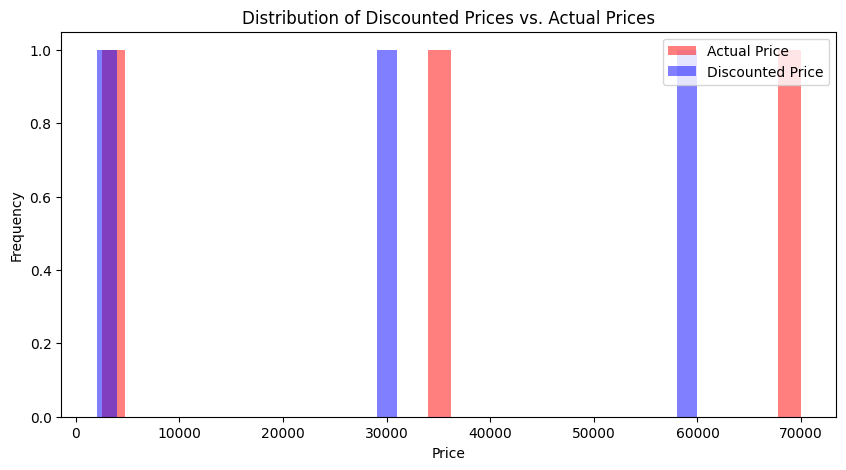

In [42]:
#3.What is the distribution of discounted prices vs. actual prices?
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("amazon_sales.csv")
if df['discounted_price'].dtype == 'O':  # 'O' means object (string)
    df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)

if df['actual_price'].dtype == 'O':
    df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Plot distribution
plt.figure(figsize=(10, 5))
plt.hist(df['actual_price'], bins=30, alpha=0.5, label="Actual Price", color='red')
plt.hist(df['discounted_price'], bins=30, alpha=0.5, label="Discounted Price", color='blue')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Discounted Prices vs. Actual Prices")
plt.legend()
plt.show()



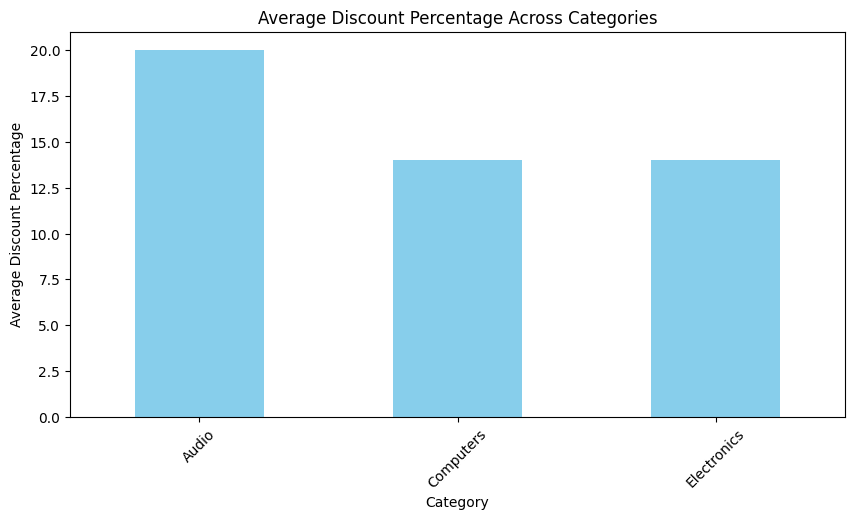

In [43]:
#4.How does the average discount percentage vary across categories?
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("amazon_sales.csv")

if df['discount_percentage'].dtype == 'O':
    df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)

avg_discount = df.groupby("category")["discount_percentage"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
avg_discount.plot(kind='bar', color='skyblue')
plt.xlabel("Category")
plt.ylabel("Average Discount Percentage")
plt.title("Average Discount Percentage Across Categories")
plt.xticks(rotation=45)
plt.show()



In [44]:
#5.What are the most popular product names?
import pandas as pd

df = pd.read_csv("amazon_sales.csv")

df['rating_count'] = df['rating_count'].astype(int)

most_popular_products = df.groupby("product_name")["rating_count"].sum().sort_values(ascending=False).head(10)

print("Most Popular Products:")
print(most_popular_products)


Most Popular Products:
product_name
Smartphone XYZ             1200
Laptop ABC                  850
Wireless Headphones PQR     500
Name: rating_count, dtype: int64


In [45]:
#6.What are the most popular product keywords?
import pandas as pd
from collections import Counter
import re

df = pd.read_csv("amazon_sales.csv")

all_product_names = " ".join(df["product_name"].dropna()).lower()

words = re.findall(r'\b\w+\b', all_product_names)

common_words = Counter(words).most_common(10)

print("Most Popular Product Keywords:")
for word, count in common_words:
    print(f"{word}: {count}")


Most Popular Product Keywords:
smartphone: 1
xyz: 1
laptop: 1
abc: 1
wireless: 1
headphones: 1
pqr: 1


In [46]:
#7.What are the most popular product reviews?
import pandas as pd

df = pd.read_csv("amazon_sales.csv")

df['rating_count'] = df['rating_count'].astype(int)

most_popular_reviews = df.sort_values(by="rating_count", ascending=False)[["review_title", "review_content", "rating_count"]].head(10)

print("Most Popular Product Reviews:")
print(most_popular_reviews)


Most Popular Product Reviews:
          review_title                     review_content  rating_count
0          Great phone  Loved the camera and battery life          1200
1  Amazing Performance            Runs all games smoothly           850
2   Good Sound Quality                    Bass is amazing           500


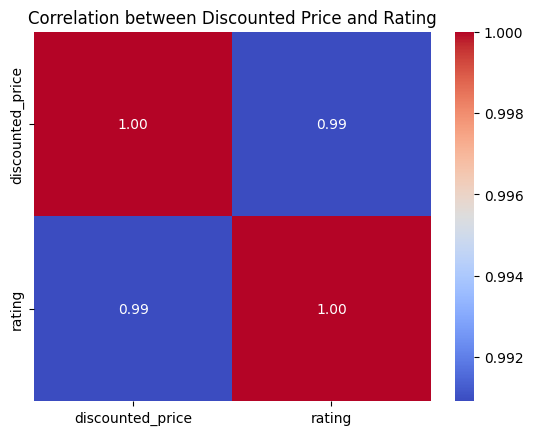

Correlation coefficient: 0.9909192335992337


In [47]:
#8.What is the correlation between discounted_price and rating?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("amazon_sales.csv")

df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

correlation = df[['discounted_price', 'rating']].corr()

sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Discounted Price and Rating")
plt.show()

print("Correlation coefficient:", correlation.loc["discounted_price", "rating"])


In [48]:
#9.What are the Top 5 categories based on the highest ratings?
import pandas as pd

df = pd.read_csv("amazon_sales.csv")

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

top_categories = df.groupby("category")["rating"].mean().sort_values(ascending=False).head(5)

print("Top 5 Categories Based on Highest Ratings:")
print(top_categories)


Top 5 Categories Based on Highest Ratings:
category
Computers      4.7
Electronics    4.5
Audio          4.2
Name: rating, dtype: float64


In [50]:
#10.Identify any potential areas for improvement or optimization based on the data analysis
import pandas as pd

df = pd.read_csv("amazon_sales.csv")

df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

if df['discount_percentage'].dtype == 'O':
    df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)

low_rated_products = df[df["rating"] < 3][["product_name", "rating", "rating_count"]].sort_values(by="rating")

high_discount_low_rating = df[(df["discount_percentage"] > 30) & (df["rating"] < 3)][["product_name", "discount_percentage", "rating"]]

high_price_low_sales = df[(df["actual_price"] > df["actual_price"].median()) & (df["rating_count"] < df["rating_count"].median())][["product_name", "actual_price", "rating_count"]]

print("Low Rated Products:")
print(low_rated_products.head(10))

print("\nHigh Discount but Low Rating Products:")
print(high_discount_low_rating.head(10))

print("\nHigh Price but Low Sales Products:")
print(high_price_low_sales.head(10))



Low Rated Products:
Empty DataFrame
Columns: [product_name, rating, rating_count]
Index: []

High Discount but Low Rating Products:
Empty DataFrame
Columns: [product_name, discount_percentage, rating]
Index: []

High Price but Low Sales Products:
Empty DataFrame
Columns: [product_name, actual_price, rating_count]
Index: []


# EDA 4

In [52]:
import os
print(os.getcwd())  # Shows your current working directory
print("File exists:", os.path.exists("spotify_hiphop_data.csv"))


/content
File exists: False


In [53]:
import pandas as pd

data = {
    "Artist": ["Drake", "Kanye West", "Eminem", "Travis Scott", "Kendrick Lamar",
               "Post Malone", "Lil Wayne", "J. Cole", "Jay-Z", "Future"],
    "Track Name": ["God's Plan", "Stronger", "Lose Yourself", "SICKO MODE", "HUMBLE.",
                   "Rockstar", "Lollipop", "MIDDLE CHILD", "Empire State of Mind", "Mask Off"],
    "Popularity": [95, 90, 92, 88, 91, 89, 85, 87, 86, 84],
    "Duration (ms)": [198000, 320000, 300000, 312000, 177000, 218000, 300000, 220000, 274000, 201000],
    "Track ID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

df = pd.DataFrame(data)
df.to_csv("spotify_hiphop_data.csv", index=False)

print(" File created: spotify_hiphop_data.csv")


✅ File created: spotify_hiphop_data.csv


In [54]:
df = pd.read_csv("spotify_hiphop_data.csv")
print(df.head())  # Verify if data is loaded correctly


           Artist     Track Name  Popularity  Duration (ms)  Track ID
0           Drake     God's Plan          95         198000         1
1      Kanye West       Stronger          90         320000         2
2          Eminem  Lose Yourself          92         300000         3
3    Travis Scott     SICKO MODE          88         312000         4
4  Kendrick Lamar        HUMBLE.          91         177000         5


In [67]:
#1.  Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful
import pandas as pd

df = pd.read_csv("spotify_hiphop_data.csv")

df = df.dropna()

df = df.drop_duplicates()

df.to_csv("spotify_hiphop_data_cleaned.csv", index=False)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         10 non-null     object
 1   Track Name     10 non-null     object
 2   Popularity     10 non-null     int64 
 3   Duration (ms)  10 non-null     int64 
 4   Track ID       10 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 532.0+ bytes
None


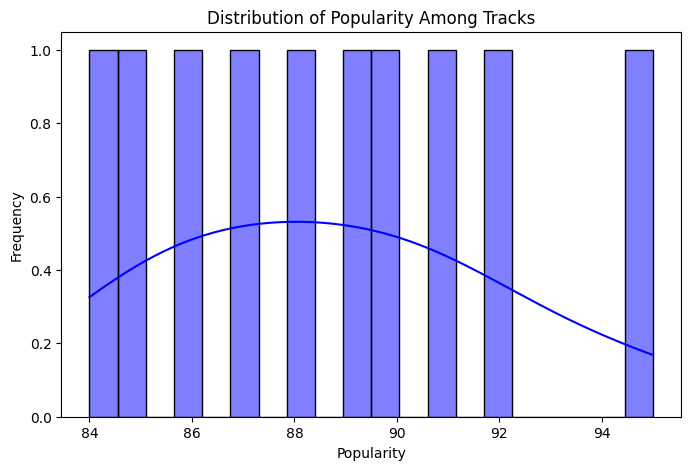

In [68]:
#2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("spotify_hiphop_data_cleaned.csv")

plt.figure(figsize=(8, 5))
sns.histplot(df["Popularity"], bins=20, kde=True, color="blue")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.title("Distribution of Popularity Among Tracks")
plt.show()


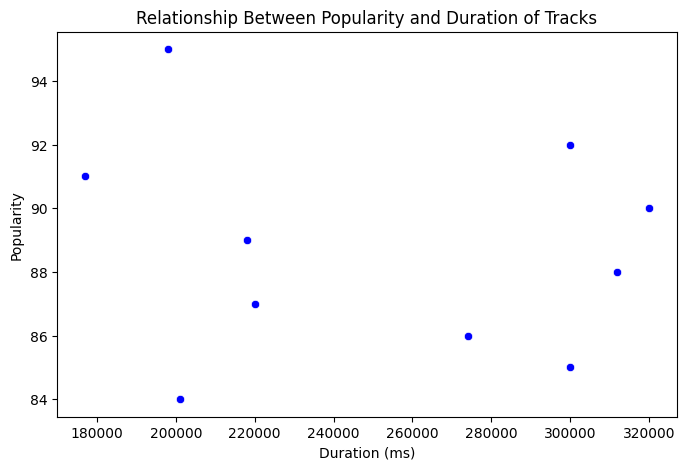

In [69]:
#3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("spotify_hiphop_data_cleaned.csv")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Duration (ms)"], y=df["Popularity"], color="blue")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.title("Relationship Between Popularity and Duration of Tracks")
plt.show()


<ipython-input-70-9c5b33ea38d5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Artist"], order=df["Artist"].value_counts().index, palette="viridis")


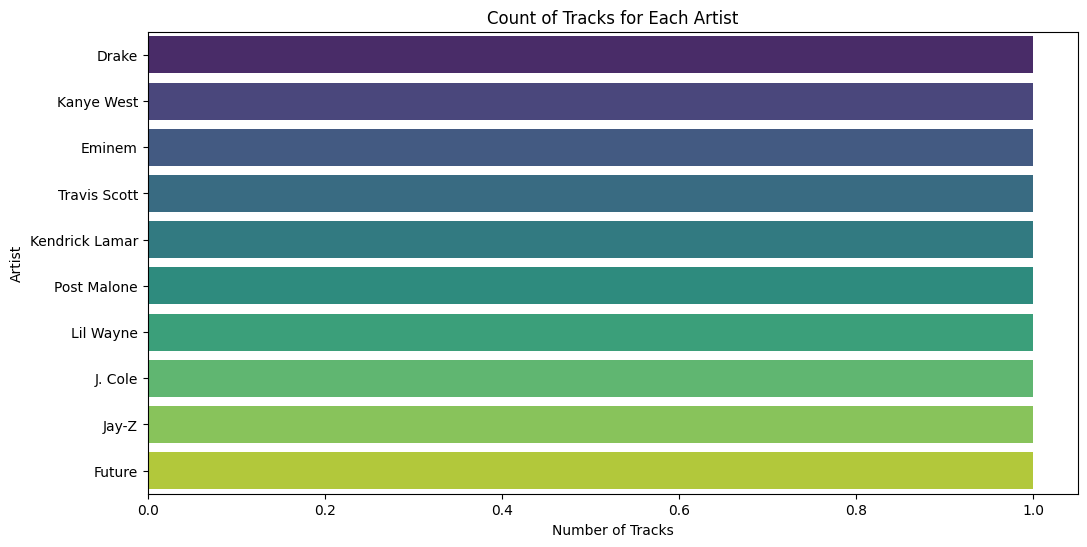

In [70]:
#4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("spotify_hiphop_data_cleaned.csv")

plt.figure(figsize=(12, 6))
sns.countplot(y=df["Artist"], order=df["Artist"].value_counts().index, palette="viridis")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist")
plt.title("Count of Tracks for Each Artist")
plt.show()


In [71]:
#5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?
import pandas as pd

df = pd.read_csv("spotify_hiphop_data_cleaned.csv")

least_popular_tracks = df.nsmallest(5, "Popularity")[["Artist", "Track Name"]]

print("Top 5 Least Popular Tracks:")
print(least_popular_tracks)


Top 5 Least Popular Tracks:
         Artist            Track Name
9        Future              Mask Off
6     Lil Wayne              Lollipop
8         Jay-Z  Empire State of Mind
7       J. Cole          MIDDLE CHILD
3  Travis Scott            SICKO MODE


In [72]:
  #6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist
import pandas as pd

df = pd.read_csv("spotify_hiphop_data_cleaned.csv")

top_5_artists = df.groupby("Artist")["Popularity"].mean().nlargest(5)

most_popular_artist = top_5_artists.idxmax()

print("Top 5 Artists by Average Popularity:\n", top_5_artists)
print("\nMost Popular Artist on Average:", most_popular_artist)


Top 5 Artists by Average Popularity:
 Artist
Drake             95.0
Eminem            92.0
Kendrick Lamar    91.0
Kanye West        90.0
Post Malone       89.0
Name: Popularity, dtype: float64

Most Popular Artist on Average: Drake


In [73]:
#7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
import pandas as pd

df = pd.read_csv("spotify_hiphop_data_cleaned.csv")

top_5_artists = df.groupby("Artist")["Popularity"].mean().nlargest(5).index

most_popular_tracks = df[df["Artist"].isin(top_5_artists)].groupby("Artist").apply(lambda x: x.nlargest(1, "Popularity"))[["Track Name", "Popularity"]]

print(most_popular_tracks.reset_index(drop=True))


      Track Name  Popularity
0     God's Plan          95
1  Lose Yourself          92
2       Stronger          90
3        HUMBLE.          91
4       Rockstar          89


<ipython-input-73-f4fb2a020b1f>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  most_popular_tracks = df[df["Artist"].isin(top_5_artists)].groupby("Artist").apply(lambda x: x.nlargest(1, "Popularity"))[["Track Name", "Popularity"]]


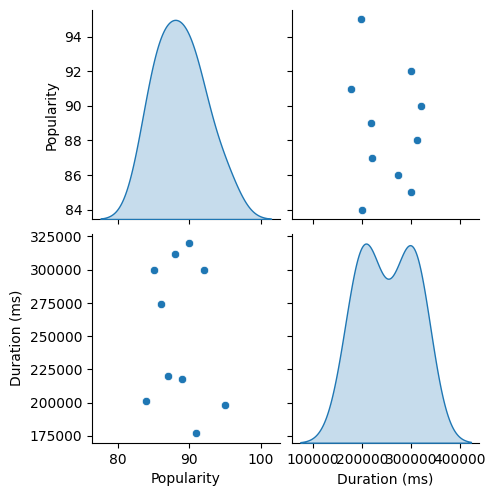

In [74]:
#8.Visualize relationships between multiple numerical variables simultaneously using a pair plot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("spotify_hiphop_data_cleaned.csv")

sns.pairplot(df[["Popularity", "Duration (ms)"]], diag_kind="kde")
plt.show()


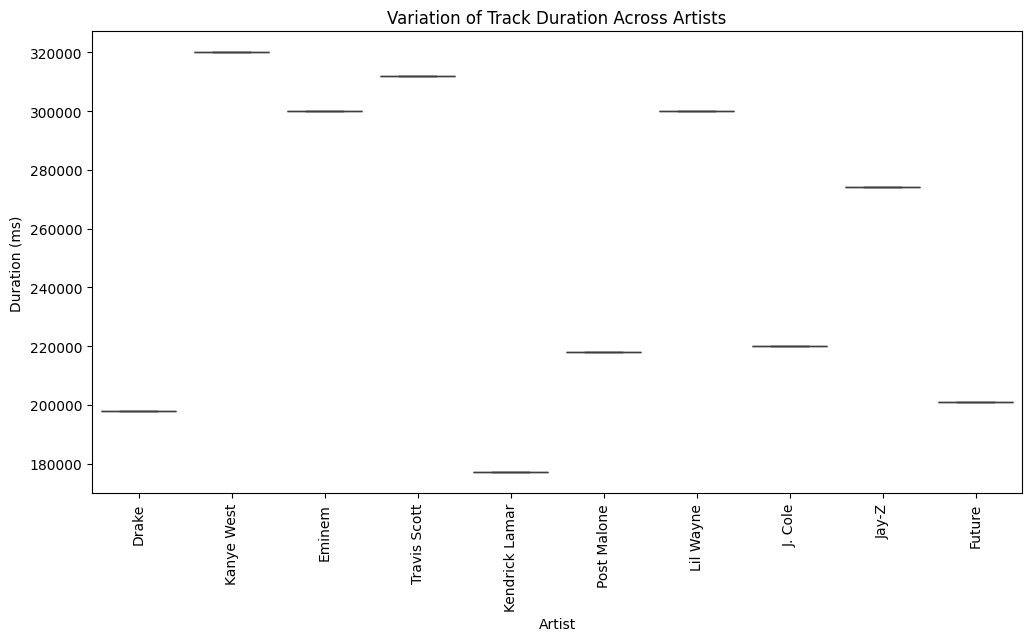

In [75]:
#9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("spotify_hiphop_data_cleaned.csv")

plt.figure(figsize=(12, 6))
sns.boxplot(x="Artist", y="Duration (ms)", data=df, showfliers=False)
plt.xticks(rotation=90)
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.title("Variation of Track Duration Across Artists")
plt.show()


<ipython-input-76-6f6a3f59a83e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Artist", y="Popularity", data=df, inner="quartile", palette="viridis")


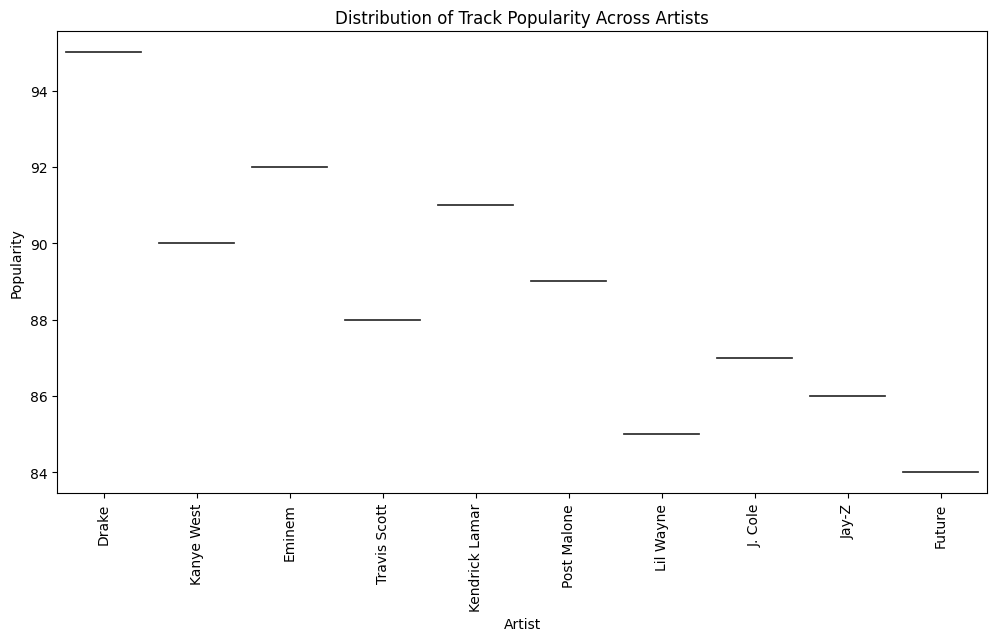

In [76]:
#10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plotHow does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("spotify_hiphop_data_cleaned.csv")

plt.figure(figsize=(12, 6))
sns.violinplot(x="Artist", y="Popularity", data=df, inner="quartile", palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Artist")
plt.ylabel("Popularity")
plt.title("Distribution of Track Popularity Across Artists")
plt.show()
